<a href="https://colab.research.google.com/github/WKorga/DataMining2019/blob/master/DataMining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Standard IPython notebook imports
!pip install -q gdown httpimport
%matplotlib inline

import os

import httpimport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import scipy.stats as sstats
import scipy.sparse as ssparse
import scipy.special as sspecial

import seaborn as sns
from sklearn import datasets


sns.set_style('whitegrid')

Zadanie 0

In [0]:
a = np.arange(1,101)
b = np.arange(1,100, step=2)
c = np.around(np.arange(-1,1.01,step=0.01),5)*np.pi
d = np.concatenate((np.arange(-1,0,0.01),np.arange(0.01,1.01,0.01)))*np.pi
e = np.sin(np.arange(1,101)).clip(min=0)
a, b, c, d, e

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
        69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
 array([-3.14159265, -3.11017673, -3.0787608 , -3.04734487, -3.01592895,
        -2.98451302, -2.95309709, -2.92168117, -2.89026524, -2.85884931,
        -2.82743339, -2.79601746, -2.76460154, -2.73318561, -2

In [0]:
A = np.arange(1,101).reshape(10,-1)
B = ssparse.diags([np.arange(99,0,-1),np.arange(1,101),np.arange(99,0,-1)],[1,0,-1]).toarray()
C = np.tri(100).T
D = np.array([np.matmul(np.arange(1,101),C),sspecial.factorial(np.arange(1,101))])
E = np.where(np.remainder(np.arange(1,101),np.arange(1,101).reshape(-1,1))==0,[1],[0])
A, B, C, D, E

(array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
        [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
        [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
        [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
        [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
        [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
        [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]]),
 array([[  1.,  99.,   0., ...,   0.,   0.,   0.],
        [ 99.,   2.,  98., ...,   0.,   0.,   0.],
        [  0.,  98.,   3., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,  98.,   2.,   0.],
        [  0.,   0.,   0., ...,   2.,  99.,   1.],
        [  0.,   0.,   0., ...,   0.,   1., 100.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [0., 1., 1., ..., 1., 1., 1.],

Zadanie 1

a)

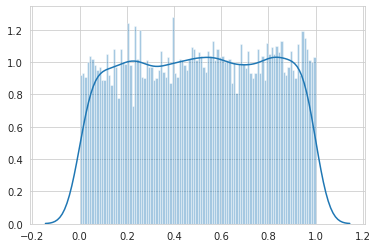

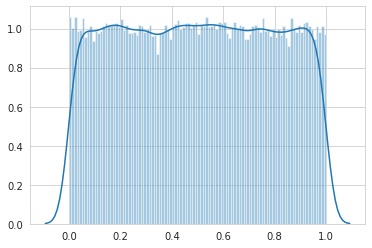

In [0]:
for x in [10000, 100000]:
  numbers = np.random.uniform(size=x)
  plt.figure()
  sns.distplot(numbers, bins=100)
  

b)

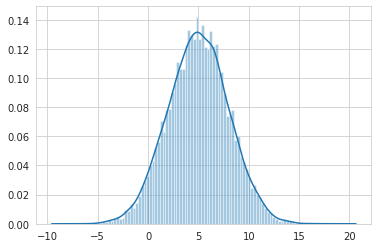

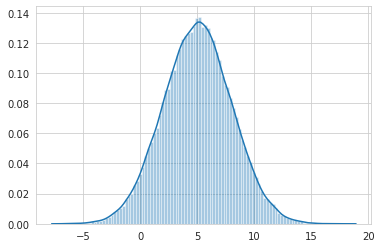

In [0]:
for x in [10000, 100000]:
  numbers = np.random.normal(5,3,size=x)
  plt.figure()
  sns.distplot(numbers, bins=100)

c)

Probability of X < Y for 10000: 0.5792
Probability of X < Y for 100000: 0.57501


<Figure size 432x288 with 0 Axes>

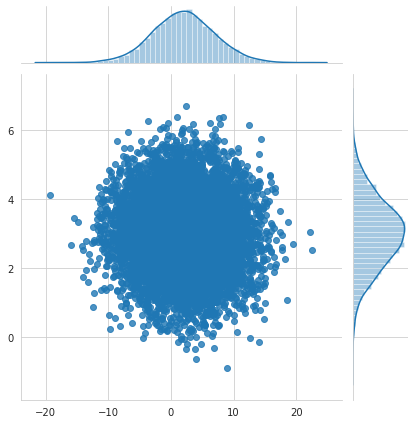

<Figure size 432x288 with 0 Axes>

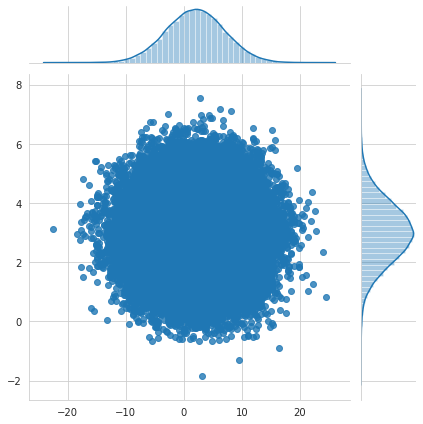

In [0]:
for x in [10000, 100000]:
  points = np.array([np.random.normal(2,5,x),np.random.normal(3,1,x)])
  plt.figure()
  sns.jointplot(points[0],points[1], kind='reg', fit_reg=False)
  #d)
  print("Probability of X < Y for "+ str(x)+": " + str(np.count_nonzero(points[0]<points[1])/points.shape[1]))


Zadanie 2

a)

In [0]:
d = 100
x = np.random.rand(d,1)
y = np.random.rand(d,1)
w = np.random.rand(d,1)

#długość
length = np.sqrt(np.sum(np.square(x)))

#średnia ważona
mean = np.sum(x*w)/np.sum(w)

#odległość
dist = np.sqrt(np.sum(np.square(x-y)))

#iloczyn
product = np.sum(x*w)

length, mean, dist, product

(5.830104509294878, 0.506210569788135, 3.9576293256964257, 23.890756898651585)

b)

In [0]:
d=100
N=1000
y = np.random.rand(d,1)
w = np.random.rand(d,1)
X = np.random.rand(d,N)

#długości
lengths = np.sqrt(np.sum(np.square(X),axis=0))

#srednia
means = np.sum(X*w,axis=0)/np.sum(w)

#odległość
dists = np.sqrt(np.sum(np.square(X-y),axis=0))

#iloczyn
products = np.sum(X*w,axis=0)

lengths, means, dists, products

(array([5.53465484, 5.43576622, 5.41468374, 5.9569027 , 6.46667447,
        5.99507002, 5.77804535, 5.78470084, 5.3750946 , 5.96972357,
        6.13893656, 5.8608049 , 5.58466648, 5.65048586, 5.34270456,
        6.05250928, 5.7094473 , 5.76921104, 5.77351314, 5.77707664,
        6.17685842, 5.80224715, 5.88694617, 5.60380848, 6.14919278,
        6.00923875, 5.46164546, 5.2840907 , 5.48732268, 5.47045137,
        6.12784893, 5.84314139, 6.31513504, 5.92835572, 5.68893787,
        5.57621484, 5.90764688, 6.0435816 , 5.79907973, 5.32734723,
        6.03088188, 5.96159879, 5.37846595, 6.21612112, 5.54489459,
        5.93578243, 5.59389709, 5.68212671, 5.43840759, 6.00966148,
        5.38046031, 6.2406537 , 5.91704117, 6.01523813, 6.42187419,
        5.71456046, 5.46598464, 5.85515293, 5.94190151, 5.82735966,
        5.60295183, 6.02607603, 5.69545123, 5.72774801, 5.55876196,
        6.22660038, 5.47763347, 5.92966241, 6.37594783, 5.5371426 ,
        5.57746762, 5.76922197, 5.63142251, 5.94

Zadanie 3

In [0]:
from sklearn import datasets
iris = datasets.load_iris() 

In [0]:
iris.data, iris.target, iris.feature_names, iris.target_names
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

[Text(0.5, 1.0, 'Iris')]

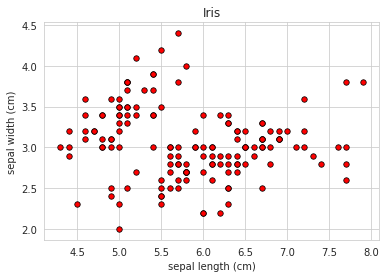

In [0]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, s=30, color='red', edgecolor='black').set(title="Iris")

[[<matplotlib.axis.YTick at 0x7f2148826780>,
 (1, 5),
 (3, 9),
 Text(0.5, 1.0, 'Iris')]

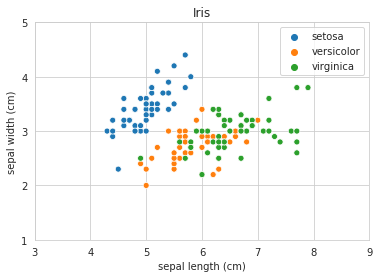

In [0]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue=iris['target_names'][iris['target']], data=iris_df).set(
    title="Iris",xlim=(3,9), ylim=(1,5), yticks= np.arange(1,6), xticks = np.arange(3,10))

Zadanie 4

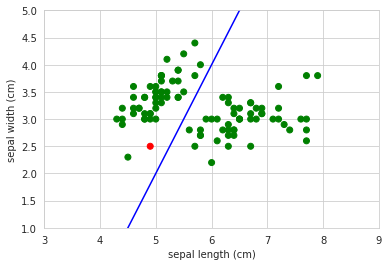

In [0]:
iris_df_nv=iris_df[iris_df['target']!=1]
fx = 2*iris_df_nv['sepal length (cm)']-8
colors = np.where((np.array(iris_df_nv['target']==0) & np.array(iris_df_nv['sepal width (cm)']<fx)) | (np.array(iris_df_nv['target']==2) & np.array(iris_df_nv['sepal width (cm)']>fx)),
         np.array(['red']),np.array(['green']))

x = np.linspace(3,9,100)
y = 2*x-8
plt.scatter(iris_df_nv['sepal length (cm)'],iris_df_nv['sepal width (cm)'],c=colors)
plt.xlim(3,9)
plt.ylim(1,5)
plt.plot(x, y, 'blue')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

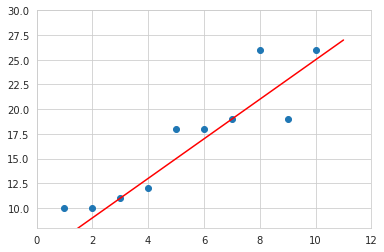

8.497058314499201

In [0]:
# Ax+By+C=0
A=2
B=-1
C=5

points = np.array([[1,10],[2,10],[3, 11], [4, 12], [5, 18], [6, 18], [7, 19], [8, 26], [9, 19], [10, 26]])
x = np.linspace(0,11,100)
y = (A*x+C)/B*-1
plt.scatter(points[:,0],points[:,1])
plt.plot(x, y, 'red')
plt.xlim(0,12)
plt.ylim(8,30)
plt.show()
np.sum(np.absolute(np.sum(points*[A,B],axis=1)+C)/np.sqrt(np.sum(np.square([A,B]))))

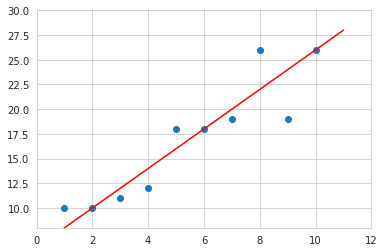

7.602631123499285

Zadanie 6

array([[12.3532331 ,  3.63175738],
       [ 9.54059056, 16.32985466],
       [18.10160886,  7.49894688],
       [ 7.13642231,  7.98831059],
       [ 8.80360514, 12.13763016],
       [18.83181106, 10.37592788],
       [ 4.99490808, 18.11213729],
       [18.52588692, 16.11985628],
       [ 8.01734189,  8.44472489],
       [ 8.02463964, 14.52032599],
       [13.08425181,  3.10694199],
       [19.99466028, 11.28029259],
       [ 2.42272316, 17.36225491],
       [15.78665287,  2.42086919],
       [ 9.28542628,  3.0378717 ],
       [10.49508701, 17.60004861],
       [10.28192697,  3.25053077],
       [10.12994875,  7.68208949],
       [ 4.89314275, 13.57417983],
       [12.86842786, 15.95717793],
       [ 8.60961233,  2.23083424],
       [ 7.27478203, 16.07026425],
       [ 9.05870086, 12.63331602]])

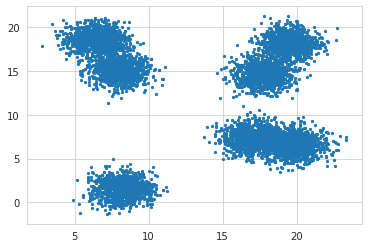

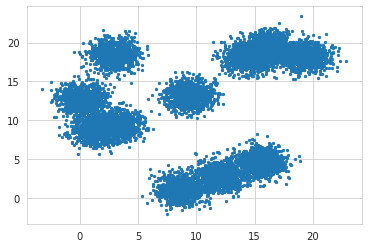

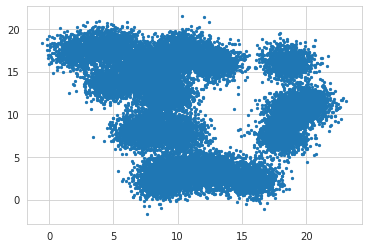

In [0]:
for K in [7,11,23]:
  n = 1000
  centr = np.random.rand(K,2)*20
  points = np.random.normal(centr,1,(n,K,2))
  plt.figure()
  plt.scatter(points[:,:,0],points[:,:,1],s=5)

7 chmur, bok 5


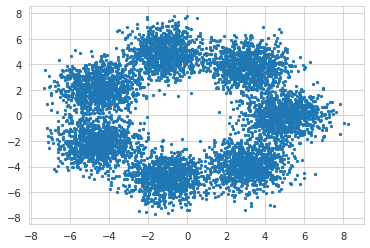

7 chmur, bok 10


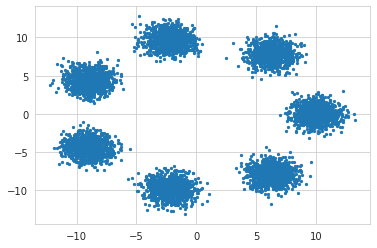

7 chmur, bok 15


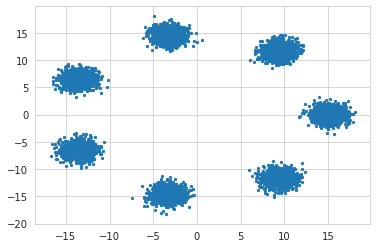

11 chmur, bok 5


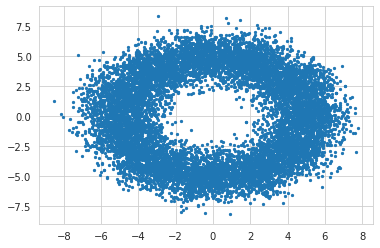

11 chmur, bok 10


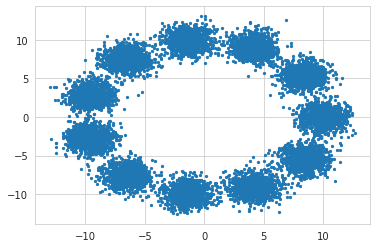

11 chmur, bok 15


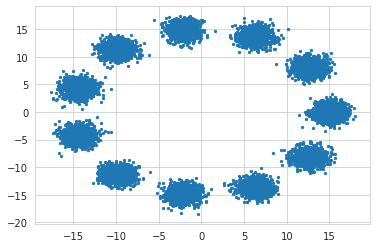

23 chmur, bok 5


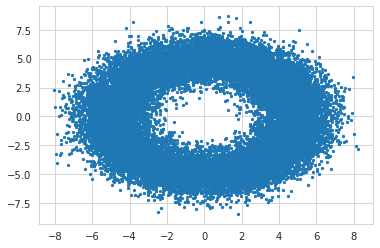

23 chmur, bok 10


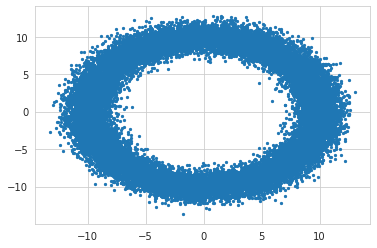

23 chmur, bok 15


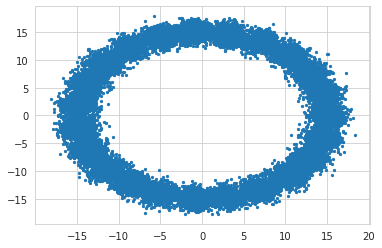

In [0]:
for K in [7,11,23]:
  for d in [5,10,15]:
    print(str(K)+" chmur, bok "+str(d))
    centr = np.array([d*np.cos(2*np.pi/K*np.arange(0,K)),d*np.sin(2*np.pi*np.arange(0,K)/K)]).T
    n = 1000
    points = np.random.normal(centr,1,(n,K,2))
    plt.figure()
    plt.scatter(points[:,:,0],points[:,:,1],s=5)
    plt.show()

Zadanie 7

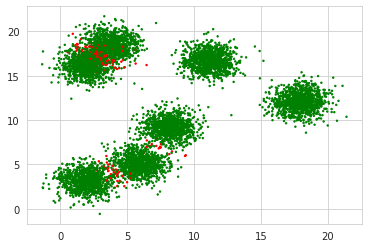

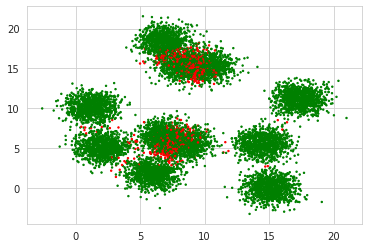

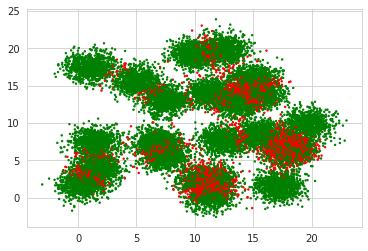

In [0]:
for K in [7,11,23]:
  n = 1000
  centr = np.random.rand(K,2)*20
  points = np.random.normal(centr,1,(n,K,2))
  colors = np.where(\
                      np.argmin(\
                                np.square(centr[:,0].reshape(-1,1)-points[:,:,0].flatten())+
                                np.square(centr[:,1].reshape(-1,1)-points[:,:,1].flatten()),0)
                      ==np.tile(np.arange(0,K),n),
                      ['green'],['red'])
  plt.figure()
  plt.scatter(points[:,:,0],points[:,:,1],s=2,c=colors)
  plt.show()

7 chmur, bok 5


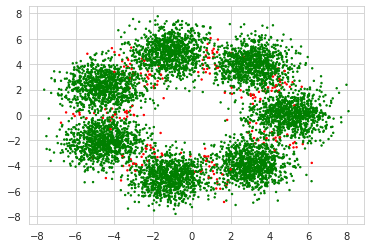

7 chmur, bok 10


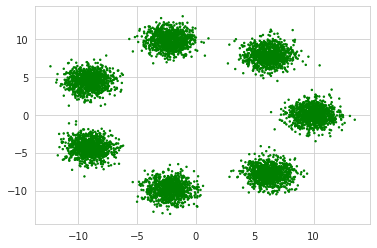

7 chmur, bok 15


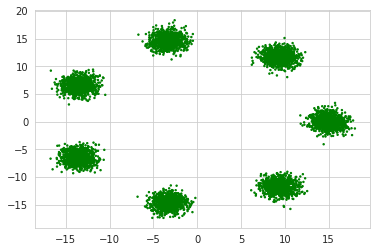

11 chmur, bok 5


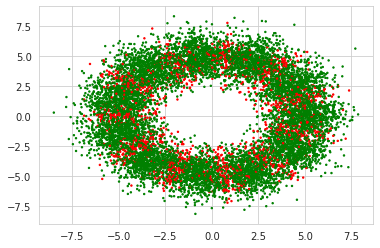

11 chmur, bok 10


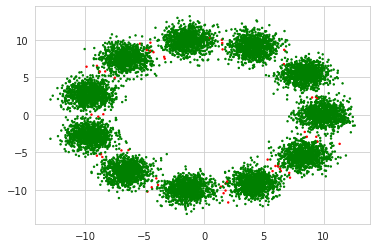

11 chmur, bok 15


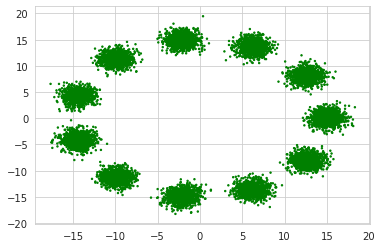

23 chmur, bok 5


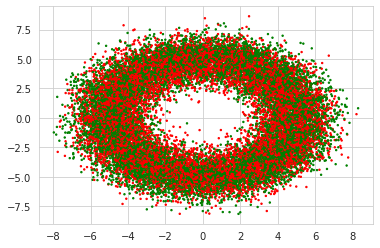

23 chmur, bok 10


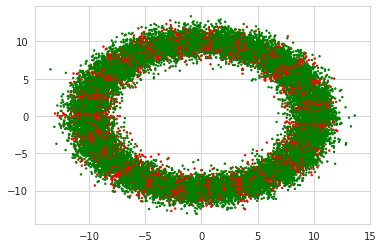

23 chmur, bok 15


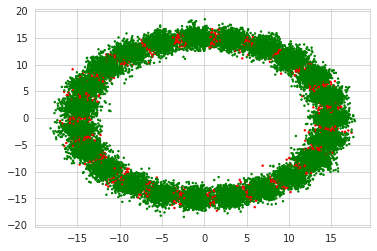

In [0]:
for K in [7,11,23]:
  for d in [5,10,15]:
    print(str(K)+" chmur, bok "+str(d))
    centr = np.array([d*np.cos(2*np.pi/K*np.arange(0,K)),d*np.sin(2*np.pi*np.arange(0,K)/K)]).T
    n = 1000
    points = np.random.normal(centr,1,(n,K,2))
    colors = np.where(\
                      np.argmin(\
                                np.square(centr[:,0].reshape(-1,1)-points[:,:,0].flatten())+
                                np.square(centr[:,1].reshape(-1,1)-points[:,:,1].flatten()),0)
                      ==np.tile(np.arange(0,K),n),
                      ['green'],['red'])
    plt.figure()
    plt.scatter(points[:,:,0],points[:,:,1],s=2,c=colors)
    plt.show()
    

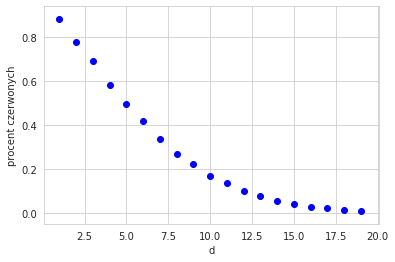

In [0]:
K=23
for d in range(1,20):
    centr = np.array([d*np.cos(2*np.pi/K*np.arange(0,K)),d*np.sin(2*np.pi*np.arange(0,K)/K)]).T
    n = 1000
    points = np.random.normal(centr,1,(n,K,2))
    colors = np.where(\
                      np.argmin(\
                                np.square(centr[:,0].reshape(-1,1)-points[:,:,0].flatten())+
                                np.square(centr[:,1].reshape(-1,1)-points[:,:,1].flatten()),0)
                      ==np.tile(np.arange(0,K),n),
                      ['green'],['red'])
    plt.scatter(d,np.count_nonzero(colors=='red')/(K*n),c="blue")
plt.xlabel('d')
plt.ylabel('procent czerwonych')
plt.show()